In [12]:
#Imports
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams['figure.figsize'] = [8, 8] # [width, height] (inches). 
alpha = 1
beta = 1
gamma = 1.
delta = 1

#### Question 1

Le terme $\alpha$ traduit la reproduction des proies (dépend donc de nombre de proies $x_1$).\
$\beta$ traduit la mort des proies tuées par les prédateurs.\
$\gamma$ traduit la mort ('naturelle') des prédateurs.\
$\delta$ traduit la reproduction des prédateurs (qui dépend du nombre de prédateurs et du nombre de proies).

Les points d'équilibres sont $(0,0)$, et $\bar{x}= (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$.

On calcule la matrice jacobienne de f $($où $\dot{x} = f(t,x)$$)$ en ces points.

On a $J_f (0,0) = \begin{pmatrix}
                   \alpha & 0 \\
                   0 & -\gamma 
                   \end{pmatrix}$

Les valeurs propres sont $\alpha > 0$ et $-\gamma < 0$, donc $(0,0)$ est un point d'équilibre instable.

Et on a $J_f (\bar{x}) = \begin{pmatrix}
                   0 & -\frac{\beta \gamma}{\delta} \\
                   \frac{\alpha \delta}{\beta} & 0
                   \end{pmatrix}$ dont les valeurs propres sont $\lambda_1 = i\sqrt{\alpha \gamma}$ et $\lambda_2 = -i\sqrt{\alpha \gamma}$ \
Les parties réelles de $\lambda_1$ et $\lambda_2$ sont nulles donc on ne peut pas conclure sur la stabilité de $\bar{x}$.

In [13]:
x01 = gamma / delta
x02 = alpha / beta

#### Question 2

In [14]:
x=np.linspace(-1,1,10)
m = np.meshgrid(x,x)

In [15]:
def f(x1,x2, t = 1):
    return np.array([x1*(alpha-beta*x2),-x2*(gamma - delta* x1)])

In [16]:
[U,V] = f(m[0],m[1])

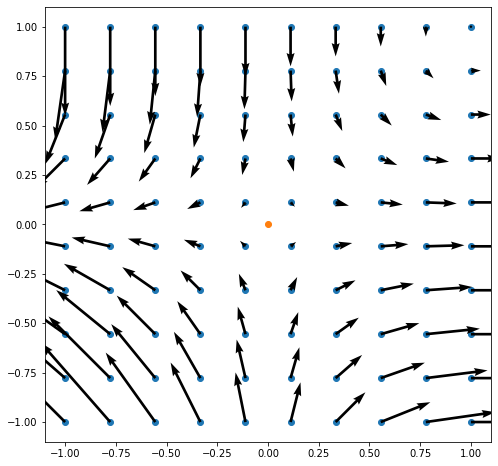

In [17]:
x=np.linspace(-1,1,10)
xv,yv=np.meshgrid(x,x)

plt.scatter(xv,yv)
plt.scatter(0,0)
R=f(xv,yv)
plt.quiver(xv,yv,R[0],R[1],scale=10)
plt.show()

In [18]:
xv2, yv2 = np.meshgrid(x+alpha/beta, x+gamma/delta)

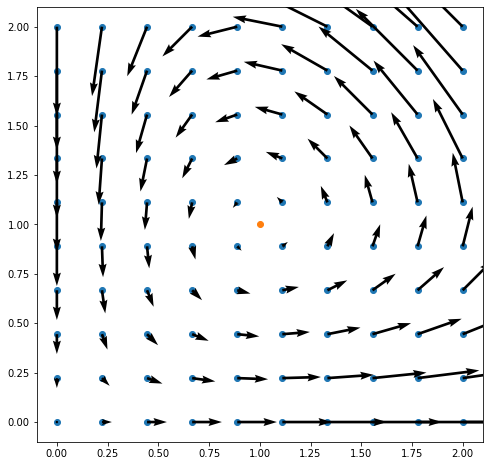

In [19]:
plt.scatter(xv2,yv2)
R2=f(xv2,yv2)
plt.scatter(alpha/beta,gamma/delta)
plt.quiver(xv2,yv2,R2[0],R2[1],scale=10)
plt.show()

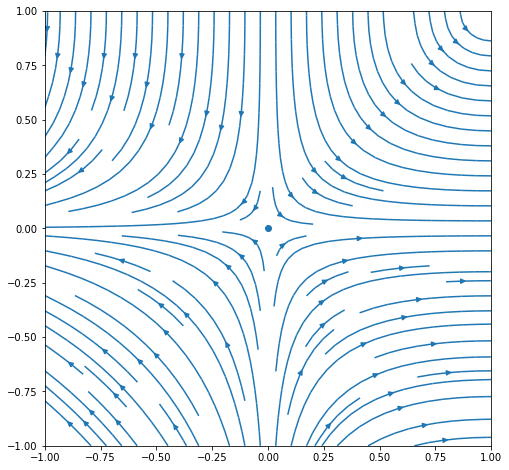

In [20]:
R=f(xv,yv)
plt.scatter(0,0)
plt.streamplot(xv,yv,R[0],R[1])
plt.show()

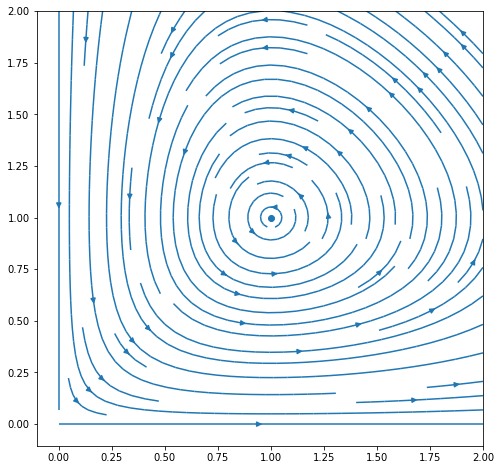

In [21]:
plt.scatter(alpha/beta,gamma/delta)
R2=f(xv2, yv2)
plt.streamplot(xv2,yv2,R2[0],R2[1])
plt.show()

On intuite que les solutions vont tourner autour de $\bar{x}$ en restant dans $\mathbb{R}^{+*}\times\mathbb{R}^{+*}$

#### Question 3

Soit $s_1$ une solution initialisée dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}}$.\
Supposons par l'absurde que $s_1$ ne reste pas dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}}$ sur son ensemble de définition. Soit $x_c$ le point de croisement de $s_1$ avec l'axe des abscisses ou avec l'axe des ordonnées.\
Alors, le problème de Cauchy $\left\{
                              \begin{array}{ll}
                                  \dot{x} = f(t,x)\\
                                x(0) = x_c
                              \end{array}
                              \right.$\
admet pour solution $s_1$ mais aussi la solution $s_2(t) = (x_c \exp (t), 0)$. Par le théorème de Cauchy-Lipschitz, comme $f$ est continûment différentiable par rapport à x, il existe une unique solution maximale dans $S_f(t_0, x_0)$, $\forall (t_0, x_0)$ sur l'ensemble de définition de $f$.

Donc toute solution initialisée dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}}$ reste dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}}$ sur son ensemble de définition.

#### Question 4

On a $\forall \ t \in \mathbb{R},$ $H'(x_1(t),x_2(t)) = (\delta - \frac{\gamma}{x_1}) \dot{x_1} + (\beta - \frac{\alpha}{x_2}) \dot{x_2}.$\
En remplaçant les expressions de $\dot{x_1}$ et $\dot{x_2}$ le long des solutions, on obtient:\
$\forall \ t \in \mathbb{R},$ $H'(x_1(t),x_2(t)) = 0$

On utilise le théorème du domaine maximal d'existence.\
Toute solution maximale est définie sur un intervalle ouvert $]a;b[$.

Supposons a ou b fini (par exemple b).\
Alors on ne pas avoir $\underset{t \to b}{lim} \ d((t, x(t)), \partial (\mathbb{R} \times X)) = 0$

Donc on devrait avoir $\underset{t \to b}{lim} \ \|x\| = +\infty$. \
Ce qui impliquerait $\underset{t \to b}{lim} \ H(x(t)) = +\infty$: absurde car H(x) est constant le long des solutions.

Donc toute solution maximale initialisée dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}}$ est définie sur $\mathbb{R}$ entier.

#### Question 5

In [22]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [23]:
def h(x1, x2):
    return delta*x1 - gamma * np.log(x1) + beta*x2 - alpha*np.log(x2)

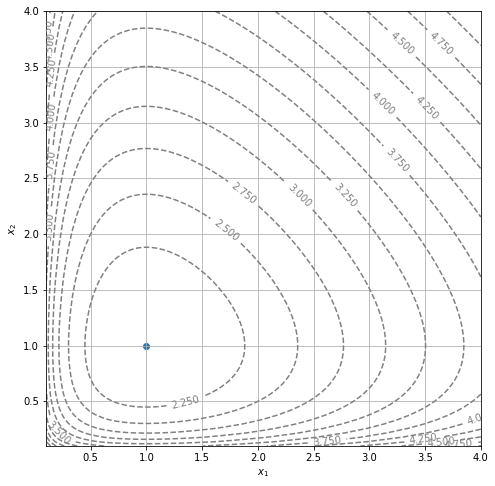

In [24]:
display_contour(
    h, 
    x=np.linspace(0.1, 4, 100), 
    y=np.linspace(0.1, 4, 100), 
    levels=15
)
plt.scatter(alpha/beta, gamma/delta)
plt.show()

Les lignes de niveau de H tournent autour de $\bar{x}$. Les solutions tournent donc autour de $\bar{x}$ et restent à une distance bornée de $\bar{x}$.

H joue le même rôle que l'énergie en physique, de même qu'un minimum d'énergie caractérise un point d'équilibre stable, un minimum de H en $\bar{x}$ montre la stabilité de ce point d'équilibre.

In [25]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        x.append(x[-1] + dt*f(t[-1],x[-1]))
        t.append(t[-1]+dt)
    return np.array(t), np.array(x)

On teste la fonction ci-dessus avec un exemple connu:

$x' = x$\
$x(0) = 1$

La solution exacte est: 

$\forall t, x(t) = e^{t}$

In [26]:
def Exp (t,x):
    return x

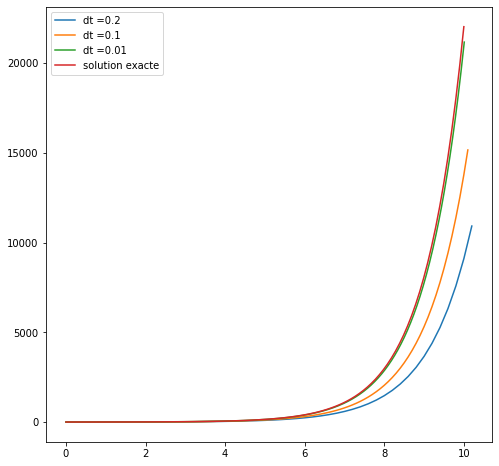

In [27]:
F=solve_euler_explicit(Exp,1,0.2,0,10)
plt.plot(F[0],F[1],label = 'dt =0.2')
F1=solve_euler_explicit(Exp,1,0.1,0,10)
plt.plot(F1[0],F1[1],label = 'dt =0.1')
F2=solve_euler_explicit(Exp,1,0.01,0,10)
plt.plot(F2[0],F2[1],label = 'dt =0.01')
t=np.linspace(0,10,100)
plt.plot(t,np.exp(t),label = 'solution exacte')
plt.legend()
plt.show()

Il y a bien convergence du schéma lorsque dt tend vers 0.

#### Question 6

Les solutions étant exponentielles, on en prend les logarithmes pour trouver l'ordre de convergence, ici affine.

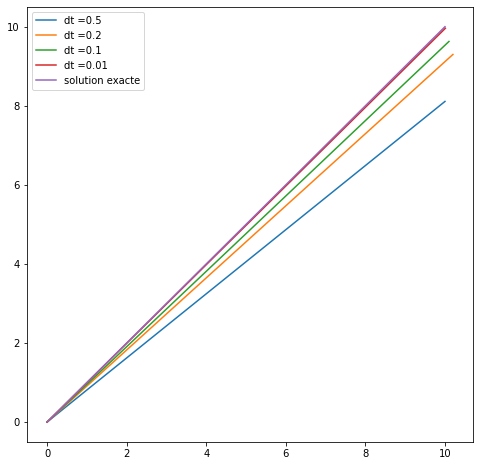

In [28]:
t=np.linspace(0,10,100)
F0=solve_euler_explicit(Exp,1,0.5,0,10)
plt.plot(F0[0],np.log(F0[1]),label = f'dt =0.5')
F=solve_euler_explicit(Exp,1,0.2,0,10)
plt.plot(F[0],np.log(F[1]),label = f'dt =0.2')
F1=solve_euler_explicit(Exp,1,0.1,0,10)
plt.plot(F1[0],np.log(F1[1]),label = f'dt =0.1')
F2=solve_euler_explicit(Exp,1,0.01,0,10)
plt.plot(F2[0],np.log(F2[1]),label = f'dt =0.01')
plt.plot(t,t,label = 'solution exacte')
plt.legend()
plt.show()

#### Question 7

Avec des temps longs

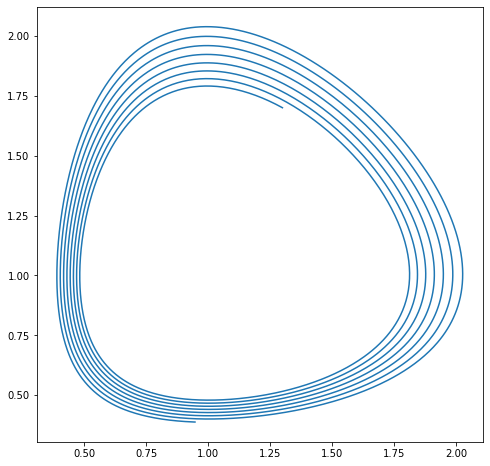

In [29]:
def f_np(t,a):
    return np.array(f(a[0],a[1]))
    
tps, val =  solve_euler_explicit(f_np, np.array([1.3,1.7]), 1/100, 0, 50)
valT = np.matrix.transpose(val)
plt.plot(valT[0], valT[1])

plt.show()

Les courbes divergent avec les temps longs, ce qui ne devrait pas être le cas.

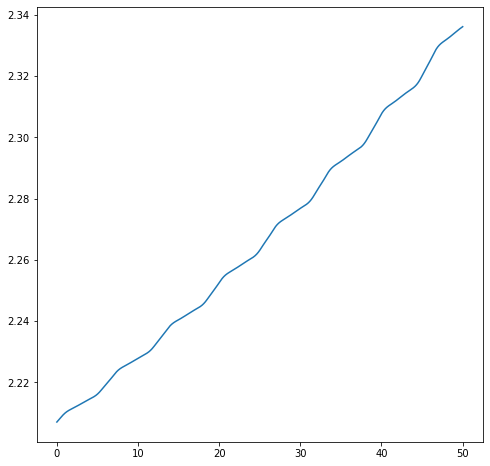

In [30]:
tps, val =  solve_euler_explicit(f_np, np.array([1.3,1.7]), 1/100, 0, 50)
valT = np.matrix.transpose(val)
plt.plot(tps, h(valT[0],valT[1]))

plt.show()

On a tracé ci-dessus l'évolution au cours du temps de la fonction H. Elle devrait être constante.

#### Question 8

In [31]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100, eps = 1e-14):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        xj = x[-1]
        tj = t[-1]
        k = 0
        xjk = xj + dt*f(tj,xj)
        xj0 = xjk
        trouve = False
        def F(a):
            return xj + dt*f(tj+dt,a)
        while k < itermax and not trouve:
            xjk1 = F(xjk)
            if np.all((xjk1 - xjk)/xj0 < eps):
                trouve = True
            else:
                xjk = xjk1
                k+=1
        x.append(xjk1)
        t.append(tj+dt)
    return np.array(t), np.array(x)

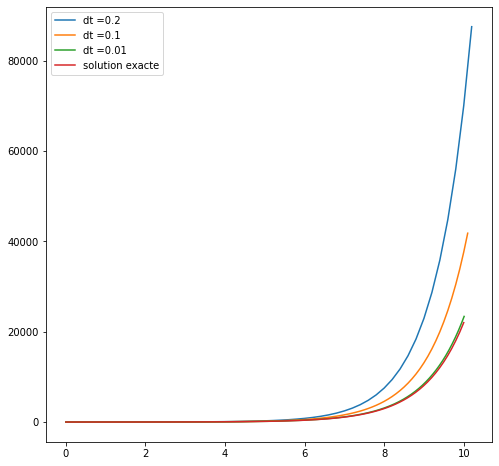

In [32]:
F=solve_euler_implicit(Exp,1,0.2,0,10)
plt.plot(F[0],F[1],label = 'dt =0.2')
F1=solve_euler_implicit(Exp,1,0.1,0,10)
plt.plot(F1[0],F1[1],label = 'dt =0.1')
F2=solve_euler_implicit(Exp,1,0.01,0,10)
plt.plot(F2[0],F2[1],label = 'dt =0.01')
t=np.linspace(0,10,100)
plt.plot(t,np.exp(t),label = 'solution exacte')
plt.legend()
plt.show()

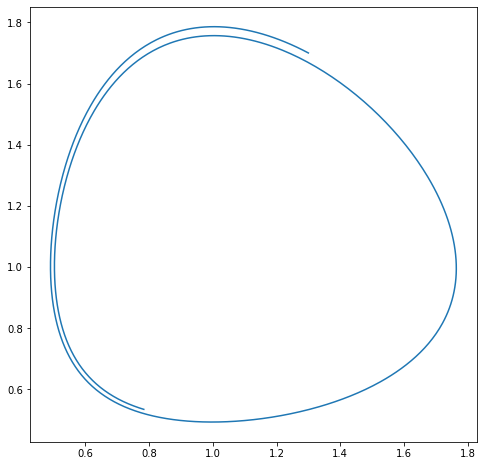

In [33]:
tps, val =  solve_euler_implicit(f_np, np.array([1.3,1.7]), 1/100, 0, 10)
valT = np.matrix.transpose(val)
plt.plot(valT[0], valT[1])
plt.show()

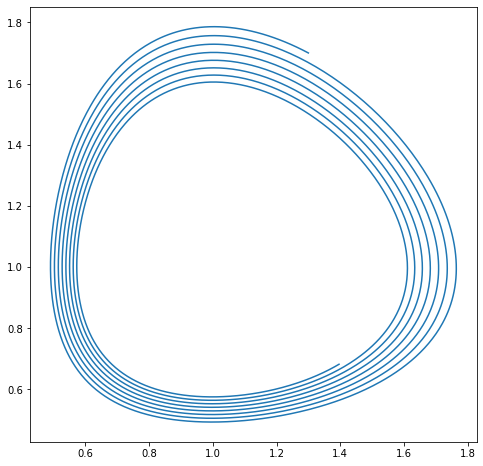

In [34]:
tps, val =  solve_euler_implicit(f_np, np.array([1.3,1.7]), 1/100, 0, 50)
valT = np.matrix.transpose(val)
plt.plot(valT[0], valT[1])
plt.show()

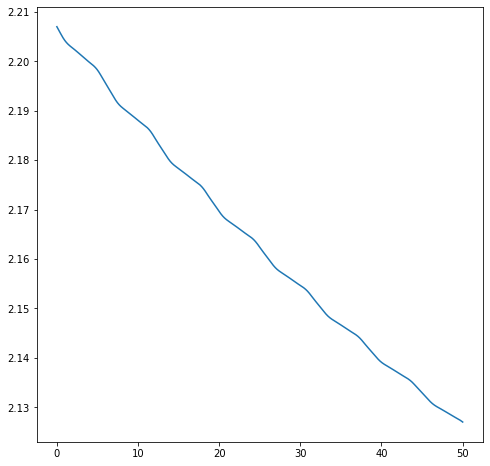

In [35]:
tps, val =  solve_euler_implicit(f_np, np.array([1.3,1.7]), 1/100, 0, 50)
valT = np.matrix.transpose(val)
plt.plot(tps, h(valT[0],valT[1]))
plt.show()

Cette fois-ci, sur le même durée, la précision du schéma est meilleure car il y a moins de divergence.

#### Question 9

Soit (E) le système d'équations de la question 9).\
Soit $u: \mathbb{R}^2 \mapsto \mathbb{R}^2$ continûment différentiable.\
Soit x une solution des équations de  Lotka-Volterra.\
Si $H_0 = H(x(0))$, alors comme $H'(x(t)) = 0$, on a donc $\forall t \in \mathbb{R}, H(x(t)) = H(x(0)) = H_0$\
Donc x est aussi solution de (E).\
Or, comme u et H sont continûment différentiables par rapport à x, d'après le théorème de Cauchy-Lipschitz, il y a unicité des solutions de (E), donc toute solution de (E) est aussi solution de Lotka-Volterra.

#### Question 10:

On trouve:
$$\frac{d}{dt}(H(x(t)-H_0) = (H(x(t))-H_0)(-u_1\frac{\partial{H(x(t))}}{\partial_{x_1}}-u_2\frac{\partial{H(x(t))}}{\partial_{x_2}}) $$\
Donc en choisissant $u_1=k\frac{\partial{H(x(t))}}{\partial_{x_1}}$ et $u_2=k\frac{\partial{H(x(t))}}{\partial_{x_2}}$\
On a bien:
$$\frac{d}{dt}(H(x(t)-H_0) = -k\|\nabla{H(x(t))}\|^2(H(x(t))-H_0)$$

On calcule ensuite:
$$\frac{d}{dt}\|(H(x(t)-H_0)\|^2 = -2k\|\nabla{H(x(t))}\|^2\|(H(x(t))-H_0)\|^2$$\
Or pour $\|x\|\to +\infty$ , $\|\nabla{H(x(t))}\|^2 = (\delta-\frac{\gamma}{x_1})^2+(\beta-\frac{\alpha}{x_2})^2\ge min(\delta, \beta)^2/2$\
donc $\exists C \in \mathbb{R^{+}}$ tel que $\|x\|>C \Rightarrow \|\nabla{H(x(t))}\|^2>min(\delta, \beta)^2/3$

Et $\|\nabla{H(x(t))}\|^2 = (\delta-\frac{\gamma}{x_1})^2+(\beta-\frac{\alpha}{x_2})^2 > 0$ pour $x\ne{\bar{x}}$

L'ensemble E={$x(t), t \in \mathbb{R}$ | $\|x(t)\|\ge C$} est un fermé borné de $\mathbb{R}^2$ donc compact et $\|\nabla{H(x(t))}\|^2$ y admet donc un minimum n.\
On suppose (énoncé) qu'il existe a réel positif tel que $\forall t \in \mathbb{R}$ , $\|x(t)-\bar{x}\|>a$\
Alors, comme $\|\nabla{H(x(t))}\|^2 = (\delta-\frac{\gamma}{x_1})^2+(\beta-\frac{\alpha}{x_2})^2 > 0$ pour $x\ne{\bar{x}}$, on a n>0

En posant $m=min(min(\delta, \beta)^2/3, n)$, on a $\forall t \in \mathbb{R}, \|\nabla{H(x(t))}\|^2>m$

D'où pour k>0: 
$$\frac{d}{dt}\|(H(x(t)-H_0)\|^2 < -2km\|(H(x(t))-H_0)\|^2$$\
En intégrant, on trouve alors: 
$$\|(H(x(t)-H_0)\|<Cste\cdot e^{-kmt}$$

#### Question 11:

Pour assurer la stabilité de H, il faut modifier l’implémentation du schéma d’Euler, en utilisant non pas la fonction de dérivation du début du sujet, mais celle introduite en question 9, en prenant pour $H_0$ la condition initiale $H(x(0))$, de manière à corriger les erreurs numériques successives.

Au premier ordre en dt on a:
$$(H(x^{j+1})-H_0) = (H(x^{j})-H_0)(1-kdt\|\nabla{H(x^{j})}\|^2)$$

Le rôle de k est d'accélérer la vitesse de convergence si il est bien choisi. Si il est choisi trop grand $(kdt>>1)$, cela risque de créer des oscillations autour de $H_0$, qu'il est préférable d'éviter pour mieux coller aux vraies solutions.